# Part 1 : Training basic CNNs from scratch

In [ ]:
# Import the necessary library
import numpy as np
import matplotlib.pyplot as plt
import keras as keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling, BatchNormalization
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau
from keras.utils import to_categorical
from keras.applications import VGG19
from sklearn.model_selection import train_test_split
import tensorflow as tf
import cv2
import requests
from PIL import Image
import requests
from io import BytesIO

## Import data from CIFAR10
### CIFAR 10 dataset contains 60000 32$\times$32 colored images with 10 classes. Each class have 6000 images, the trainning dataset have 50000 images and 10000 images for the test.

In [ ]:
# Import data from CIFAR10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

170498071/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


## The train dataset will be split in two part : 80% of the dataset will be used to train the model and 20% will be for the validation set

In [ ]:
# Define the data for validation
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2)

# Let's take a look at few image in the traning dataset

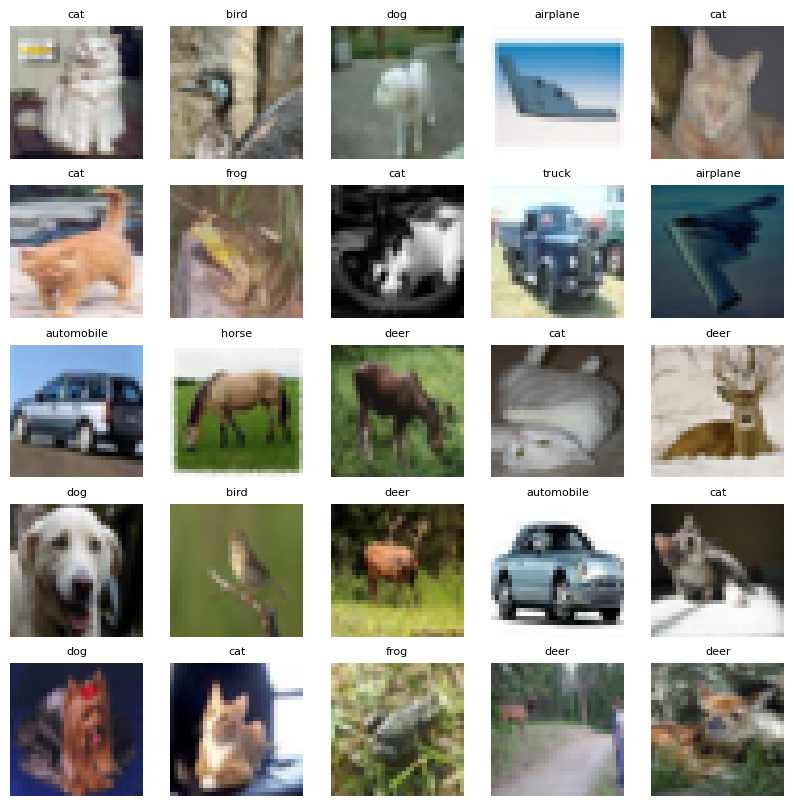

In [ ]:
# Visualize the data
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']
w = 5
l = 5
fig, axes = plt.subplots(l, w, figsize = (10,10))
axes = axes.ravel()
n = len(x_train)
for i in np.arange(0, l*w):
  image_id = np.random.randint(0,n)
  axes[i].imshow(x_train[image_id])
  label = labels[int(y_train[image_id])]
  axes[i].set_title(label, fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.2)


## Conversion

In [ ]:
# Convert the labels vector to categorical vector
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
y_validation=to_categorical(y_validation)

In [ ]:
# Convert the data type to float32
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_validation = x_validation.astype(np.float32)

## Now, we will normalize de data

In [ ]:
# Normalize the data
x_train /= 255
x_test /= 255
x_validation /= 255

# Model bulding
### For the first model, we'll just use 4 convolution layers, the activation function for each these layers will be 'relu'.
### The two first convolution layers will use 32 filters and the last two convolution layers will use 64 filters.


In [ ]:
model_1 = Sequential()

model_1.add(Conv2D(32,(3, 3), strides=1,  padding='same',activation='relu', input_shape=(32,32,3)))
model_1.add(Conv2D(32,(3, 3), strides=1,  padding='same',activation='relu'))
model_1.add(MaxPooling2D(2, 2))

model_1.add(Conv2D(64,(3, 3), strides=1,  padding='same',activation='relu'))
model_1.add(Conv2D(64,(3, 3), strides=1,  padding='same',activation='relu'))
model_1.add(MaxPooling2D((2, 2)))



model_1.add(Flatten())
model_1.add(Dense(64, activation = 'relu'))
model_1.add(Dense(10, activation='softmax'))
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                 

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]

batch_size = 32

data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
validation_generator = data_generator.flow(x_validation, y_validation, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
model_1.compile(
    optimizer = 'adam',
    loss="categorical_crossentropy",
    metrics=["accuracy"],)


history_1 = model_1.fit(train_generator,
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data = validation_generator,
              batch_size = batch_size
              )

Epoch 1/50
1250/1250 [==============================] - 45s 35ms/step - loss: 1.5996 - accuracy: 0.4150 - val_loss: 1.3283 - val_accuracy: 0.5182
Epoch 2/50
1250/1250 [==============================] - 46s 37ms/step - loss: 1.1978 - accuracy: 0.5710 - val_loss: 1.1190 - val_accuracy: 0.6062
Epoch 3/50
1250/1250 [==============================] - 45s 36ms/step - loss: 1.0221 - accuracy: 0.6392 - val_loss: 0.9674 - val_accuracy: 0.6580
Epoch 4/50
1250/1250 [==============================] - 38s 31ms/step - loss: 0.9263 - accuracy: 0.6752 - val_loss: 0.8965 - val_accuracy: 0.6878
Epoch 5/50
1250/1250 [==============================] - 44s 36ms/step - loss: 0.8557 - accuracy: 0.6993 - val_loss: 0.8952 - val_accuracy: 0.6891
Epoch 6/50
1250/1250 [==============================] - 47s 38ms/step - loss: 0.8031 - accuracy: 0.7203 - val_loss: 0.8126 - val_accuracy: 0.7176
Epoch 7/50
1250/1250 [==============================] - 35s 28ms/step - loss: 0.7648 - accuracy: 0.7330 - val_loss: 0.8382 -

## Plot of the loss function and the accuracy function

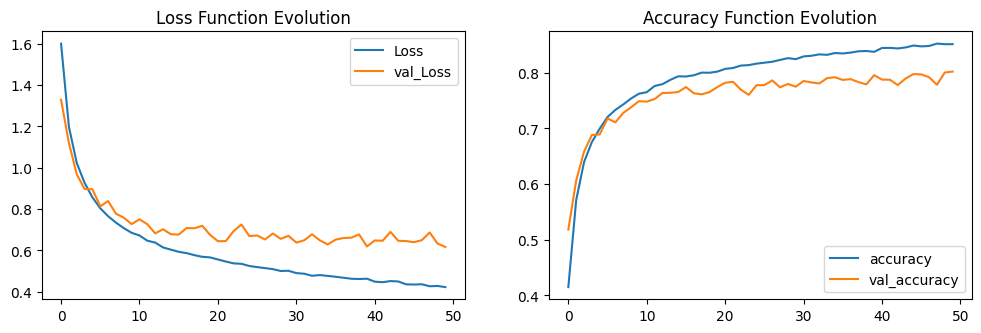

In [ ]:
plt.figure(figsize=(12, 16))
plt.subplot(4, 2, 1)
plt.plot(history_1.history['loss'], label='Loss')
plt.plot(history_1.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history_1.history['accuracy'], label='accuracy')
plt.plot(history_1.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

### After 50 epochs, we can see that the accuracy for the validation is already 80% which is not very far from that of trains, which is 85% .It mean that the 80% of the image in the validation data are recognized by the model.
### Now, let try this model to predict image from the test set.

## Let try a prediction by using our model

1/1 [==============================] - 0s 32ms/step
horse


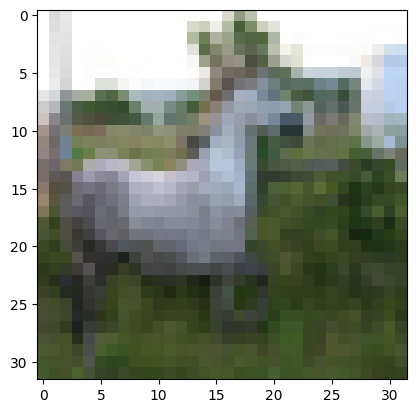

In [ ]:
# Pick the number of the photo wich you want to know to label or pick just a random value between 0 and 9999
image_id = 69
# Plot of the image and the prediction clas for the image
plt.imshow(x_test[image_id])
print(labels[np.argmax(model_1.predict(x_test[image_id].reshape(1,32,32,3)))])

### You can test many numbers and see if the model gave you the true prediction.

# Model 2

## Let's now build a another model and see if we can increase the validation accuracy and reduice the loss function.
## In this second model, we will add batch mormalization and dropout to obtain a better results. The dropout will help us to avoid the overfiting.
## We will add too two another convolution layers and let's see the results.

In [ ]:
# Build the model
model = Sequential()

model.add(Conv2D(32,(3, 3), strides=1,  padding='same',activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3, 3), strides=1,  padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3, 3), strides=1,  padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3, 3), strides=1,  padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3, 3), strides=1,  padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3, 3), strides=1,  padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

# Training of the model

In [ ]:
# Train the model
callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]

batch_size = 32

data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
validation_generator = data_generator.flow(x_validation, y_validation, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
model.compile(
    optimizer = 'adam',
    loss="categorical_crossentropy",
    metrics=["accuracy"],)


history = model.fit(train_generator,
              epochs=100,
              steps_per_epoch=steps_per_epoch,
              validation_data = validation_generator,
              batch_size = batch_size
              )

Epoch 1/100
1250/1250 [==============================] - 66s 46ms/step - loss: 1.6433 - accuracy: 0.4038 - val_loss: 1.3266 - val_accuracy: 0.5268
Epoch 2/100
1250/1250 [==============================] - 48s 38ms/step - loss: 1.2377 - accuracy: 0.5614 - val_loss: 1.1936 - val_accuracy: 0.5855
Epoch 3/100
1250/1250 [==============================] - 48s 39ms/step - loss: 1.0567 - accuracy: 0.6328 - val_loss: 1.0876 - val_accuracy: 0.6330
Epoch 4/100
1250/1250 [==============================] - 45s 36ms/step - loss: 0.9541 - accuracy: 0.6702 - val_loss: 0.8982 - val_accuracy: 0.6898
Epoch 5/100
1250/1250 [==============================] - 39s 31ms/step - loss: 0.8690 - accuracy: 0.7020 - val_loss: 0.8143 - val_accuracy: 0.7232
Epoch 6/100
1250/1250 [==============================] - 40s 32ms/step - loss: 0.8111 - accuracy: 0.7243 - val_loss: 0.7392 - val_accuracy: 0.7427
Epoch 7/100
1250/1250 [==============================] - 35s 28ms/step - loss: 0.7659 - accuracy: 0.7407 - val_loss: 0

# Plot of the loss and accuracy

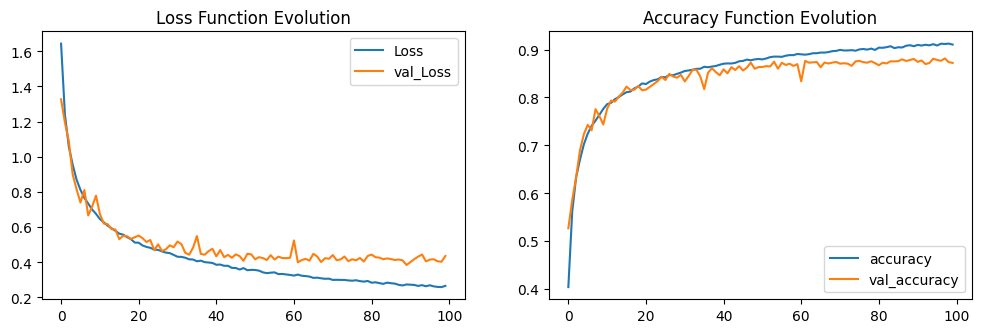

In [ ]:
# Plot curve to visualize the evolution of loss and accuracy
plt.figure(figsize=(12, 16))
plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

## As we can see, the second model is much better than the first. At 50th epoch, the accuracy for the second model is already 86% wich is much better than 80%. At 100th epoch the augmentation of the accuracy is just increasing by 1%, which means that there is almost no further evolution of accuracy. So it's better to stop at 100 epochs to save time and memory.

# Now let's make a prediction with this model


## You can proceed as in the first model to make a test the model.

1/1 [==============================] - 0s 32ms/step
truck


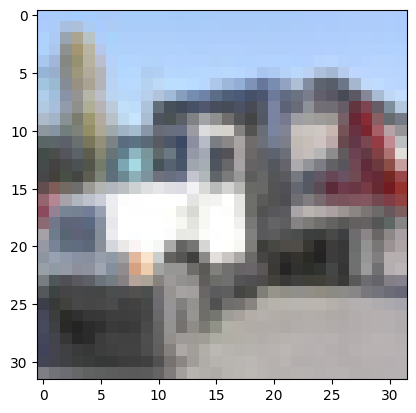

In [ ]:
# Make a prediction
image_id = 45

plt.imshow(x_test[image_id])
print(labels[np.argmax(model.predict(x_test[image_id].reshape(1,32,32,3)))])

# Part 2 : Input masking

## In this section, we will use a preentrained model to generate a saliency map for a handfull of random images. The model we going to use is VGG19.

In [ ]:
model = VGG19(weights='imagenet')

574710816/574710816 [==============================] - 19s 0us/step


## Define the saliency map

In [ ]:
def saliency_map(image, occlusion_size, step):
  imag = cv2.resize(image, (224, 224))

  # Find the prediction for image with the model
  im = tf.keras.applications.vgg19.preprocess_input(imag)
  prediction = model.predict(np.expand_dims(im, axis=0))
  class_prob = np.argmax(prediction)

  height, width, _ = im.shape
  occlusion_probabilities = np.zeros((height, width))
  for y in range(0, height, step):
      for x in range(0, width, step):
          # Create a copy of the image with the square occluded
          occluded_image = image.copy()
          occluded_image = cv2.resize(occluded_image, (224, 224))
          occluded_image[y:y+occlusion_size, x:x+occlusion_size] = 0

          # Reshize the image to the form expected by the model VGG19
          occluded_image = tf.keras.applications.vgg19.preprocess_input(occluded_image)

          #  Make a prediction with the model
          prediction = model.predict(np.expand_dims(occluded_image, axis=0))
          top_class_prob = prediction[0][np.argmax(prediction)]

          # Record the probability in the salience map
          occlusion_probabilities[y:y+occlusion_size, x:x+occlusion_size] = top_class_prob
  return occlusion_probabilities, imag, prediction


## Get images to test the saliency map
## We will pick somme images in the net to test the saliency map.

In [ ]:
# Get the images from the internet
# These link are the link that the images will be downloaded
images_url = ["https://www.thoughtco.com/thmb/LpGwtdlbtCRWp1rGfnA6jpWSVxY=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/close-up-of-orange-starfish-on-sand-489010151-59847f7f22fa3a0010518acc.jpg",
               "https://raw.githubusercontent.com/EliSchwartz/imagenet-sample-images/master/n01843065_jacamar.JPEG",
                "https://raw.githubusercontent.com/EliSchwartz/imagenet-sample-images/master/n02701002_ambulance.JPEG",
              "https://media.cnn.com/api/v1/images/stellar/prod/221216150405-c919a.jpg?c=16x9&q=h_720,w_1280,c_fill/f_webp"]
images = []
for url in images_url:
    response = requests.get(url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        img = np.array(img)
        images.append(img)



## Collect data for every that we downloaded.

In [ ]:
occlusion_probabilities_list = []
image_list = []
prediction_list = []
for image in images:
  from keras.applications.vgg19 import decode_predictions

  occlusion_probabilities , imag, prediction = saliency_map(image , 32, 32)
  image_list.append(imag)
  occlusion_probabilities_list.append(occlusion_probabilities)
  prediction_list.append(prediction)
#At this point, the three lists (occlusion_probabilities_list, image_list, prediction_list) contain the data collected for each image in the "images" list.

## Plot the real image and the saliency map
## In addition, this will display the top 5 predictions with associated class names and probability scores.

In [ ]:
def plot_saliency_map(occlusion_probabilities, imag, prediction):
  fig, axes = plt.subplots(1, 2, figsize=(12, 4))
  oc = axes[1].imshow(occlusion_probabilities, cmap='jet')
  axes[1].axis('off')
  axes[1].set_title("Saliency map")

  top_predictions = decode_predictions(prediction, top=5)[0]
  for i, (imagenet_id, label, score) in enumerate(top_predictions):
      print(f"{i + 1}: {label} ({score:.2f})")

  im = axes[0].imshow(tf.keras.preprocessing.image.array_to_img(imag))
  axes[0].axis('off')
  axes[0].set_title("Original image")
  cax = plt.axes([0.92, 0.1, 0.02, 0.8]) # Reposition the colorbar
  plt.colorbar(oc, cax=cax)
  plt.show()

1: starfish (1.00)
2: sea_urchin (0.00)
3: sea_slug (0.00)
4: sea_cucumber (0.00)
5: earthstar (0.00)


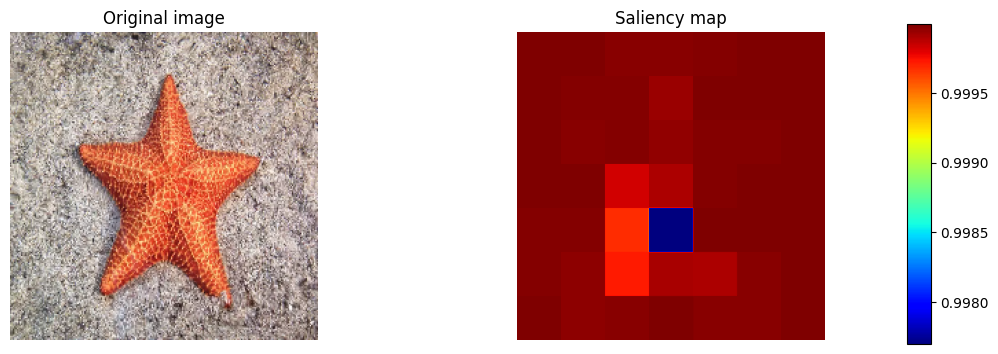

1: jacamar (0.92)
2: bee_eater (0.08)
3: hummingbird (0.00)
4: coucal (0.00)
5: vine_snake (0.00)


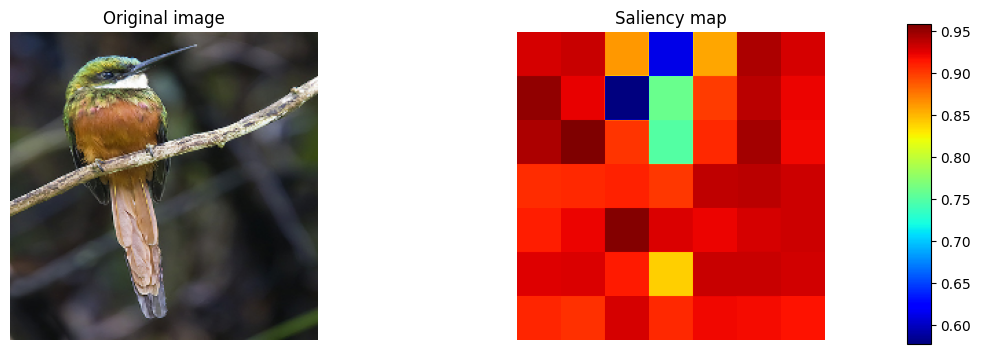

1: ambulance (0.98)
2: police_van (0.01)
3: minibus (0.00)
4: moving_van (0.00)
5: recreational_vehicle (0.00)


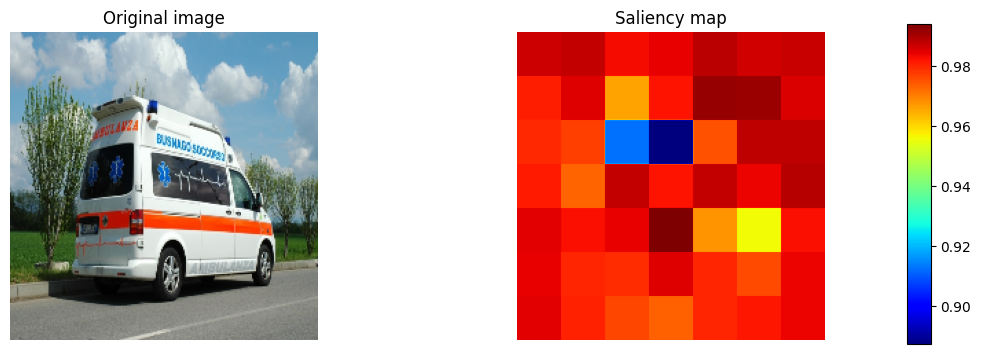

1: airliner (0.94)
2: wing (0.03)
3: warplane (0.02)
4: space_shuttle (0.00)
5: airship (0.00)


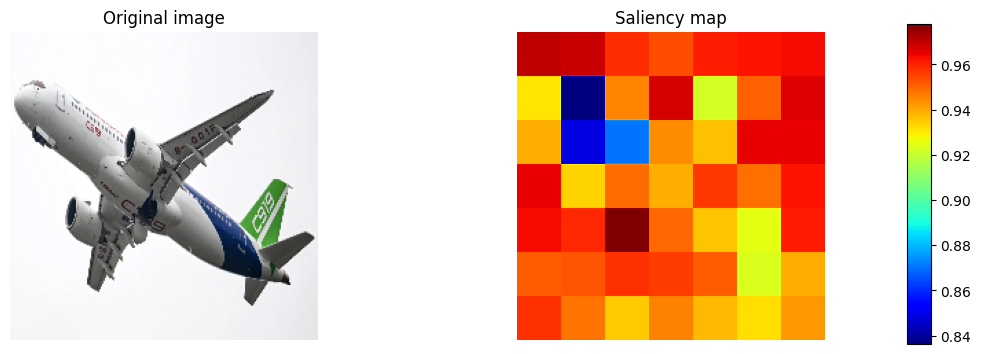

In [ ]:
for occlusion_probabilities, imag, prediction in zip(occlusion_probabilities_list,image_list, prediction_list ):
  plot_saliency_map(occlusion_probabilities, imag, prediction)